In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Data Generation
===

In [21]:
from numpy.random import rand, randn

In [22]:
n, d, k = 100, 2, 2

In [23]:
np.random.seed(20)
X = rand(n, d)

# means = [rand(d)  for _ in range(k)]  # works for any k
means = [rand(1,d) * 0.5 + 0.5 , - rand(1,d)  * 0.5 + 0.5]  # for better plotting when k = 2

S = np.diag(rand(d))

sigmas = [S]*k # we'll use the same Sigma for all clusters for better visual results

print(means)
print(sigmas)

[array([[0.69872366, 0.75176984]]), array([[0.25997411, 0.14504062]])]
[array([[0.01764816, 0.        ],
       [0.        , 0.06360523]]), array([[0.01764816, 0.        ],
       [0.        , 0.06360523]])]


Solution
===

In [24]:
def compute_log_p(X, mean, sigma):
    dxm = X - mean
    exponent = -0.5 * np.sum(dxm * np.dot(dxm, np.linalg.inv(sigma)), axis=1)
    return exponent - np.log(2 * np.pi) * (d / 2) - 0.5 * np.log(np.linalg.det(sigma))

In [25]:
log_ps = [compute_log_p(X, m, s) for m, s in zip(means, sigmas)]  # exercise: try to do this without looping

In [27]:
assignments = np.argmax(log_ps, axis=0)
print(assignments)

[0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0
 1 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1
 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0]


IndexError: index 1 is out of bounds for axis 1 with size 1

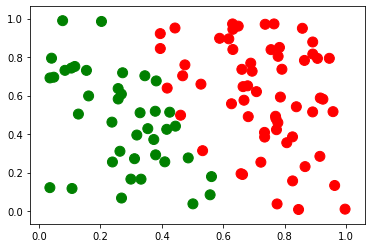

In [28]:
colors = np.array(['red', 'green'])[assignments]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=100)
plt.scatter(np.array(means)[:, 0], np.array(means)[:, 1], marker='*', s=200)
plt.show()